In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/Asus/pk/merged-dataset 2019-2021.xlsx")

In [3]:
df.head()

Station Code                                       Station Name  \
0          26.0  WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA   
1        1513.0  BOREWELL KRISHNA MURTHY, D.NO. 48-16-43 AUTONA...   
2        1514.0  BOREWELL        VIJAY        KUMAR AUTONAGAR V...   
3        1516.0                BOREWELL OF NAVLOK GARDENS, NELLORE   
4        1517.0           BOREWELL  NEAR  TUNGBHADRA RIVER KURNOOL   

       State Name  Year  Temperature ⁰C    pH  Conductivity (µmhos/cm)  \
0  ANDHRA PRADESH  2019            25.5  7.85                   1827.5   
1  ANDHRA PRADESH  2019            26.0  7.55                   1834.5   
2  ANDHRA PRADESH  2019            25.5  7.55                   1718.0   
3  ANDHRA PRADESH  2019            19.0  7.95                   1228.0   
4  ANDHRA PRADESH  2019            22.0  7.50                   5010.0   

   B.O.D.  Nitrate-N + Nitrite-N (mg/l)  Faecal Coli form (MPN/100ml)  \
0    1.10                         1.955                         219.5   
1    1.10                         2.275                         432.0   
2    2.65                         0.840                         210.5   
3    1.20                         1.580                         210.5   
4    0.80                         4.000                           2.0   

   Total Coli form (MPN/100ml)  
0                          2.5  
1                          2.5  
2                          2.5  
3                          2.5  
4                          2.0

In [4]:
df.shape

(3107, 11)

In [5]:
df.isnull().sum()

Station Code                    6
Station Name                    0
State Name                      6
Year                            0
Temperature ⁰C                  0
pH                              0
Conductivity (µmhos/cm)         0
B.O.D.                          0
Nitrate-N + Nitrite-N (mg/l)    0
Faecal Coli form (MPN/100ml)    0
Total Coli form (MPN/100ml)     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Station Code                    0
Station Name                    0
State Name                      0
Year                            0
Temperature ⁰C                  0
pH                              0
Conductivity (µmhos/cm)         0
B.O.D.                          0
Nitrate-N + Nitrite-N (mg/l)    0
Faecal Coli form (MPN/100ml)    0
Total Coli form (MPN/100ml)     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3106
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station Code                  3101 non-null   float64
 1   Station Name                  3101 non-null   object 
 2   State Name                    3101 non-null   object 
 3   Year                          3101 non-null   int64  
 4   Temperature ⁰C                3101 non-null   float64
 5   pH                            3101 non-null   float64
 6   Conductivity (µmhos/cm)       3101 non-null   float64
 7   B.O.D.                        3101 non-null   float64
 8   Nitrate-N + Nitrite-N (mg/l)  3101 non-null   float64
 9   Faecal Coli form (MPN/100ml)  3101 non-null   float64
 10  Total Coli form (MPN/100ml)   3101 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 290.7+ KB


In [9]:
df.shape

(3101, 11)

In [10]:
df_final = df.select_dtypes(exclude="object")

In [11]:
df.columns

Index(['Station Code', 'Station Name', 'State Name', 'Year', 'Temperature ⁰C',
       'pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)'],
      dtype='object')

In [12]:
df_final.drop(["Station Code",'Temperature ⁰C','Year'], axis=1, inplace=True)

In [13]:
df_final.head()

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
0  7.85                   1827.5    1.10                         1.955   
1  7.55                   1834.5    1.10                         2.275   
2  7.55                   1718.0    2.65                         0.840   
3  7.95                   1228.0    1.20                         1.580   
4  7.50                   5010.0    0.80                         4.000   

   Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)  
0                         219.5                          2.5  
1                         432.0                          2.5  
2                         210.5                          2.5  
3                         210.5                          2.5  
4                           2.0                          2.0

In [14]:
wi = np.array([0.3344, 0.0028425, 0.5685, 0.0632, 0.28425, 0.0028425])

In [15]:
si = np.array([8.5, 1000, 5, 45, 100, 1000])

In [16]:
videal = np.array([7, 0, 0, 0, 0, 0])

In [17]:
def calc_wqi(sample):
    wqi_sample = 0
    num_col = 6
    for index in range(num_col):
        v_index = sample[index]
        v_index_ideal = videal[index]
        w_index = wi[index]
        std_index = si[index]
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100
        wqi_sample += q_index * w_index
    return wqi_sample

In [18]:
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [19]:
wqi_arr = calc_wqi_for_df(df_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [20]:
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(3101, 7)

In [21]:
df_wqi[(df_wqi["WQI"] < 0)]

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
60    6.00                    121.0     1.3                          1.20   
201   6.65                    613.0     0.0                          4.15   
209   6.30                    307.0     0.0                          2.89   
210   6.50                    238.0     0.0                          0.10   
211   6.50                     98.0     0.0                          0.06   
...    ...                      ...     ...                           ...   
2999  5.60                     91.5     1.0                          0.30   
3000  6.10                    111.5     1.0                          0.30   
3001  5.65                    114.0     1.0                          0.30   
3002  5.85                    104.5     1.0                          0.30   
3037  6.40                    199.5     1.0                          0.30   

      Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)        WQI  
60                             2.0                          2.0  -6.740337  
201                            6.0                          4.5  -5.338798  
209                            2.0                          0.0 -14.543684  
210                            8.0                          0.0  -8.790971  
211                            2.0                          0.0 -10.541883  
...                            ...                          ...        ...  
2999                           2.0                          2.0 -19.203456  
3000                           2.0                          2.0  -8.051104  
3001                           2.0                          2.0 -18.082394  
3002                           2.0                          2.0 -13.626427  
3037                           2.0                          2.0  -1.338090  

[427 rows x 7 columns]

In [22]:
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [23]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (1 if (x <= 25)  
                                        else(2 if (26<=x<=50) 
                                        else(3 if (51<=x<=75) 
                                        else(4 if (76<=x<=100) 
                                        else 5)))))

In [24]:
df_wqi.head()

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
0  7.85                   1827.5    1.10                         1.955   
1  7.55                   1834.5    1.10                         2.275   
2  7.55                   1718.0    2.65                         0.840   
3  7.95                   1228.0    1.20                         1.580   
4  7.50                   5010.0    0.80                         4.000   

   Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)         WQI  \
0                         219.5                          2.5   94.643955   
1                         432.0                          2.5  148.406012   
2                         210.5                          2.5  102.833484   
3                         210.5                          2.5   95.228964   
4                           2.0                          2.0   22.797605   

   WQI clf  
0        4  
1        5  
2        5  
3        4  
4        1

In [25]:
df_wqi["WQI clf"].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [26]:
merged_dataset_without_temperature = 'dataset without temperature.xlsx'
df_wqi.to_excel(merged_dataset_without_temperature, index=False)

In [27]:
df_wqi["WQI clf"].value_counts()

1    1702
2     647
5     202
3      83
4      40
Name: WQI clf, dtype: int64

In [28]:
df_wqi.shape

(2674, 8)

In [29]:
df_wqi.columns

Index(['pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)', 'WQI', 'WQI clf'],
      dtype='object')

In [30]:
X = df_wqi[['pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Total Coli form (MPN/100ml)',
       'Faecal Coli form (MPN/100ml)']]

In [31]:
y = df_wqi[['WQI clf']]

In [32]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU  
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.utils import to_categorical

# Convert the target variable to categorical (1 to 5)
y = to_categorical(y - 1, num_classes=5)  # Subtract 1 to convert classes from 1-5 to 0-4

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(GRU(64))
model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for input to the GRU model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")



Epoch 1/50
67/67 [==============================] - 6s 21ms/step - loss: 1.0691 - accuracy: 0.6199 - val_loss: 0.8865 - val_accuracy: 0.6879
Epoch 2/50
67/67 [==============================] - 1s 9ms/step - loss: 0.9262 - accuracy: 0.6396 - val_loss: 0.8434 - val_accuracy: 0.6841
Epoch 3/50
67/67 [==============================] - 1s 9ms/step - loss: 0.8658 - accuracy: 0.6512 - val_loss: 0.7879 - val_accuracy: 0.7084
Epoch 4/50
67/67 [==============================] - 1s 9ms/step - loss: 0.8247 - accuracy: 0.6676 - val_loss: 0.7660 - val_accuracy: 0.7159
Epoch 5/50
67/67 [==============================] - 1s 9ms/step - loss: 0.7872 - accuracy: 0.6854 - val_loss: 0.7167 - val_accuracy: 0.7551
Epoch 6/50
67/67 [==============================] - 1s 9ms/step - loss: 0.7477 - accuracy: 0.6989 - val_loss: 0.6675 - val_accuracy: 0.7589
Epoch 7/50
67/67 [==============================] - 1s 9ms/step - loss: 0.6575 - accuracy: 0.7536 - val_loss: 0.5961 - val_accuracy: 0.7963
Epoch 8/50
67/67 [=

17/17 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

     Class 1       0.95      0.99      0.97       360
     Class 2       0.88      0.81      0.85       112
     Class 3       0.50      0.62      0.55        13
     Class 4       0.25      0.14      0.18         7
     Class 5       0.78      0.65      0.71        43

    accuracy                           0.90       535
   macro avg       0.67      0.64      0.65       535
weighted avg       0.90      0.90      0.90       535



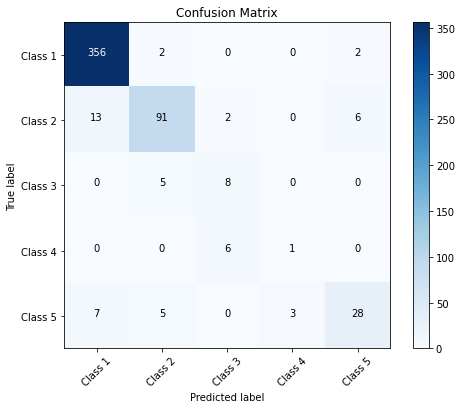

In [35]:
# Generate a classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Generate a confusion matrix graph
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
